In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Correlation

In [6]:
df = pd.read_csv('../data_sets/single_family_home_values.csv')

In [7]:
df.corr()
#will range from -1:-1

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,1.000000,-0.007972,-0.092638,0.039591,0.076366,0.128491,0.094063,0.143069,0.045336,0.041342,0.069275,0.012363,0.126193
zipcode,-0.007972,1.000000,0.461953,0.394500,-0.018420,-0.007543,0.031346,0.000812,-0.037696,-0.174142,0.032898,0.033123,0.089104
latitude,-0.092638,0.461953,1.000000,0.499432,-0.083083,-0.237716,-0.213634,-0.256475,-0.092881,-0.105518,-0.126800,-0.225513,-0.266116
longitude,0.039591,0.394500,0.499432,1.000000,0.022375,0.107666,0.026108,0.067845,0.066228,0.060827,0.036747,0.097487,0.121984
bedrooms,0.076366,-0.018420,-0.083083,0.022375,1.000000,0.505931,0.712343,0.620965,0.158497,-0.061681,0.135036,0.211982,0.369125
bathrooms,0.128491,-0.007543,-0.237716,0.107666,0.505931,1.000000,0.686296,0.804179,0.259073,0.194597,0.296577,0.453678,0.715926
rooms,0.094063,0.031346,-0.213634,0.026108,0.712343,0.686296,1.000000,0.771194,0.175949,-0.047720,0.230537,0.370929,0.581023
squareFootage,0.143069,0.000812,-0.256475,0.067845,0.620965,0.804179,0.771194,1.000000,0.369244,0.115298,0.334441,0.506272,0.824506
lotSize,0.045336,-0.037696,-0.092881,0.066228,0.158497,0.259073,0.175949,0.369244,1.000000,0.285517,0.193421,0.226043,0.456539
yearBuilt,0.041342,-0.174142,-0.105518,0.060827,-0.061681,0.194597,-0.047720,0.115298,0.285517,1.000000,0.077553,0.113356,0.174430


<AxesSubplot:>

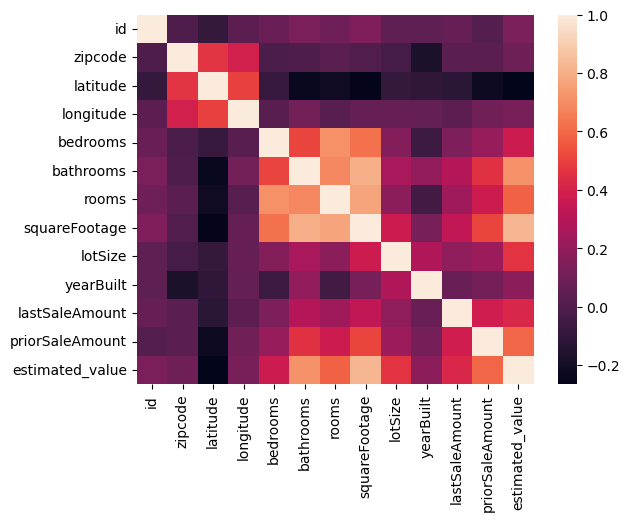

In [8]:
sns.heatmap(df.corr())

In [9]:
# covarience, unstandardized form of correlation 
df.cov()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,3.832695e+15,-4.794798e+06,-134755.796294,97277.793396,4.241855e+06,9.277448e+06,1.140562e+07,7.357116e+09,8.457335e+09,7.661356e+07,3.326786e+12,2.403030e+11,3.940756e+12
zipcode,-4.794798e+06,9.438634e+01,0.105769,0.152571,-1.605609e-01,-8.546300e-02,5.964580e-01,6.549458e+00,-1.103540e+03,-5.065034e+01,2.479246e+05,1.030079e+05,4.366604e+05
latitude,-1.347558e+05,1.057691e-01,0.000555,0.000468,-1.754563e-03,-6.524595e-03,-9.848155e-03,-5.015548e+00,-6.593470e+00,-7.428908e-02,-2.317704e+03,-1.773170e+03,-3.163364e+03
longitude,9.727779e+04,1.525709e-01,0.000468,0.001583,7.981594e-04,4.991539e-03,2.032934e-03,2.241057e+00,7.941290e+00,7.233661e-02,1.134553e+03,1.306180e+03,2.449320e+03
bedrooms,4.241855e+06,-1.605609e-01,-0.001755,0.000798,8.050231e-01,5.294167e-01,1.251811e+00,4.627877e+02,4.285138e+02,-1.656479e+00,9.398271e+04,6.326439e+04,1.670586e+05
bathrooms,9.277448e+06,-8.546300e-02,-0.006525,0.004992,5.294167e-01,1.360206e+00,1.567688e+00,7.790507e+02,9.104679e+02,6.793260e+00,2.683082e+05,1.783968e+05,4.211742e+05
rooms,1.140562e+07,5.964580e-01,-0.009848,0.002033,1.251811e+00,1.567688e+00,3.836116e+00,1.254643e+03,1.038417e+03,-2.797016e+00,3.502513e+05,2.430849e+05,5.740237e+05
squareFootage,7.357116e+09,6.549458e+00,-5.015548,2.241057,4.627877e+02,7.790507e+02,1.254643e+03,6.899562e+05,9.241945e+05,2.866840e+03,2.154884e+08,1.377630e+08,3.454582e+08
lotSize,8.457335e+09,-1.103540e+03,-6.593470,7.941290,4.285138e+02,9.104679e+02,1.038417e+03,9.241945e+05,9.079853e+06,2.575406e+04,4.521032e+08,1.919438e+08,6.939180e+08
yearBuilt,7.661356e+07,-5.065034e+01,-0.074289,0.072337,-1.656479e+00,6.793260e+00,-2.797016e+00,2.866840e+03,2.575406e+04,8.962271e+02,1.801012e+06,1.141169e+06,2.634072e+06


In [ ]:
#look at new dataset and identify outliers 


In [40]:
X = df[['bedrooms','bathrooms','rooms','squareFootage','lotSize', 'yearBuilt','priorSaleAmount']]

In [14]:
y= df.estimated_value


In [12]:
X.columns

Index(['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'priorSaleAmount'],
      dtype='object')

# visually can see data has outliers skewing accurary at times

===
bedrooms
mean: 2.7084
std: 0.8972307998543382


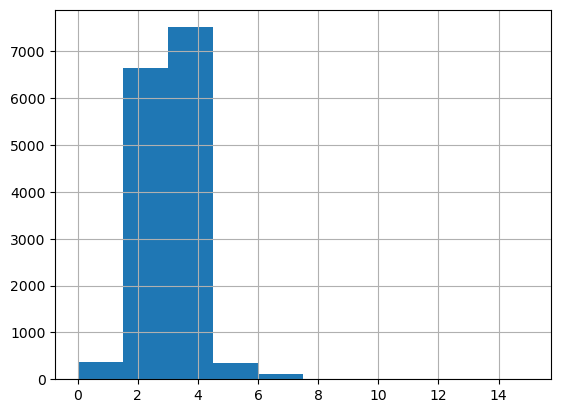

===
bathrooms
mean: 2.1950666666666665
std: 1.1662788442928953


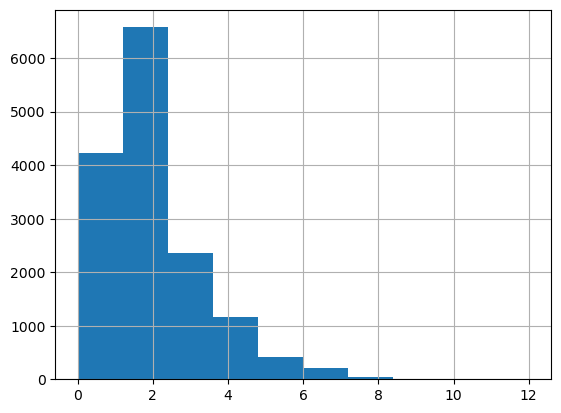

===
rooms
mean: 6.164133333333333
std: 1.958600518215801


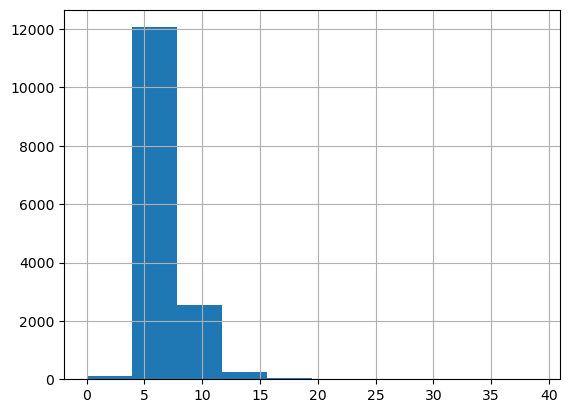

===
squareFootage
mean: 1514.5044
std: 830.6359987331762


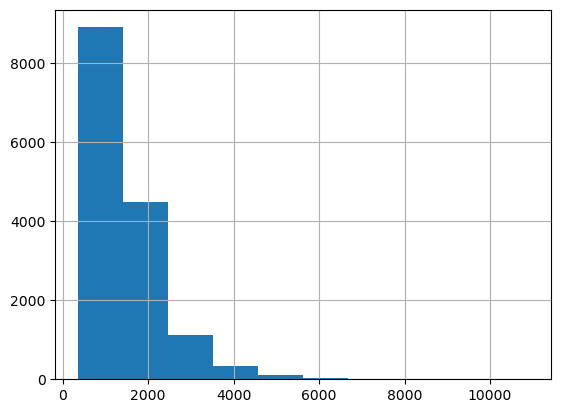

===
lotSize
mean: 5820.7662
std: 3013.279470369183


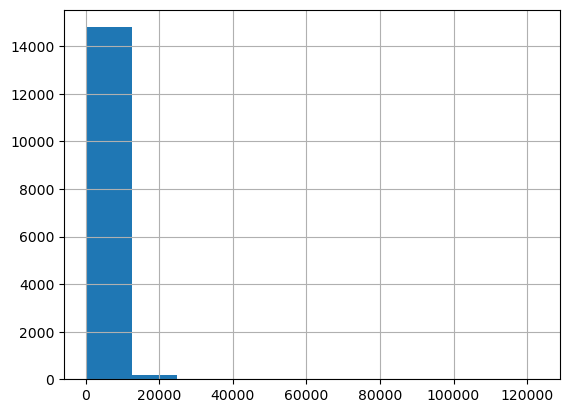

===
yearBuilt
mean: 1929.5171678111874
std: 29.937051495199263


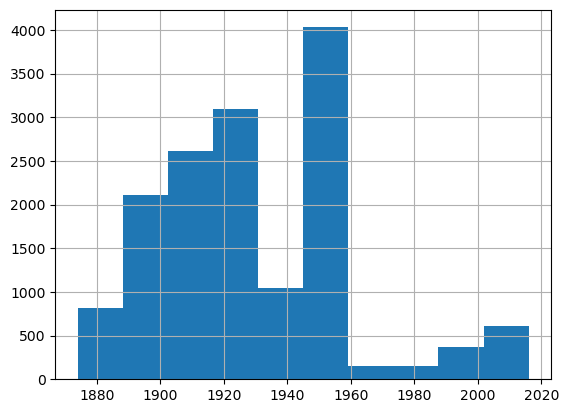

===
priorSaleAmount
mean: 259435.01461858777
std: 337938.69776081224


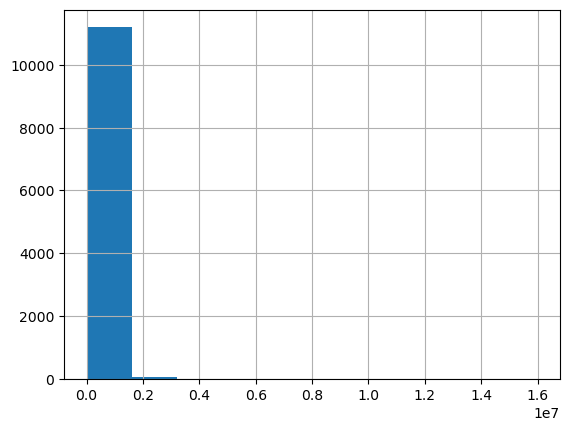

In [31]:
for i in X.columns:
    print ('===')
    print (i)
    X.loc[:,i].hist()
    print ('mean:', X.loc[:, i].mean())
    print ('std:' , X.loc[:, i].std())

    plt.show()

In [ ]:
# Adjusting data view for outliers and dropping outliers 

In [35]:
X2 = X[(X.bedrooms<7) & (X.bathrooms<7)]

<AxesSubplot:>

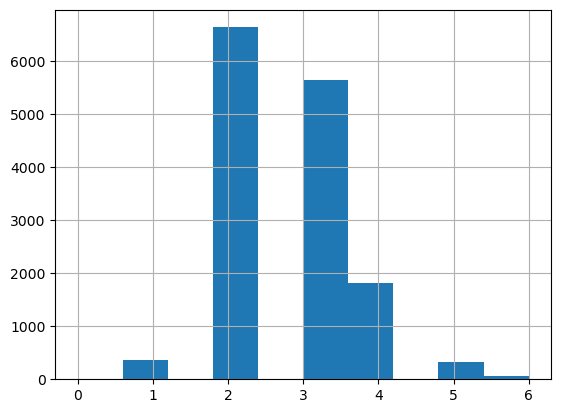

In [36]:
X2.bedrooms.hist()

<AxesSubplot:>

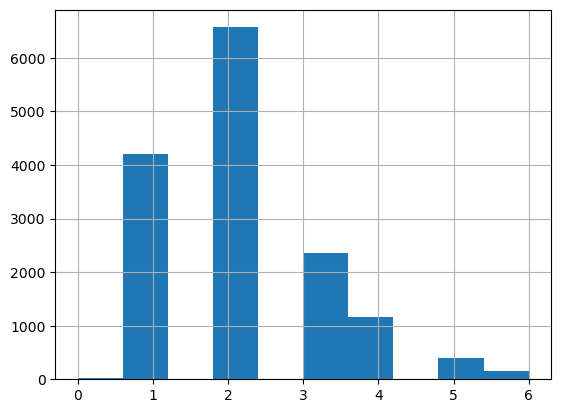

In [37]:
X2.bathrooms.hist()

# Outliers
    # 1. Three sigma Rule:
        -look at histogram and determine where cutoff should be to reduce outliers 
    
    #2. Boxplot Rule:

In [47]:
X3= df[['bedrooms','bathrooms','rooms']]

<AxesSubplot:>

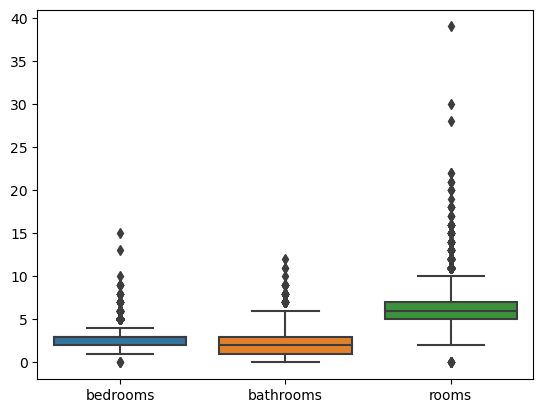

In [48]:
sns.boxplot(data = X3)

In [59]:
X4= df[['squareFootage','lotSize', 'yearBuilt']]

<AxesSubplot:>

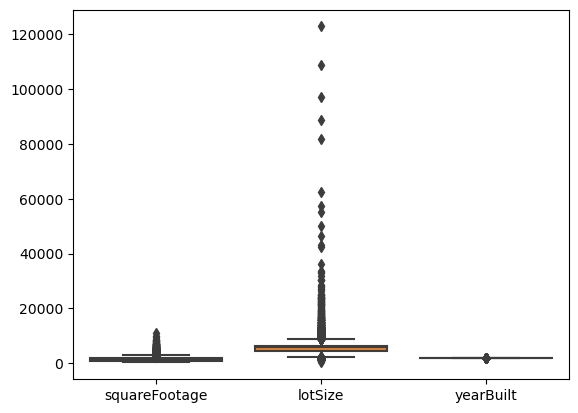

In [60]:
sns.boxplot(data = X4)

In [63]:
X5= X[(X.priorSaleAmount<1000000)]

<AxesSubplot:>

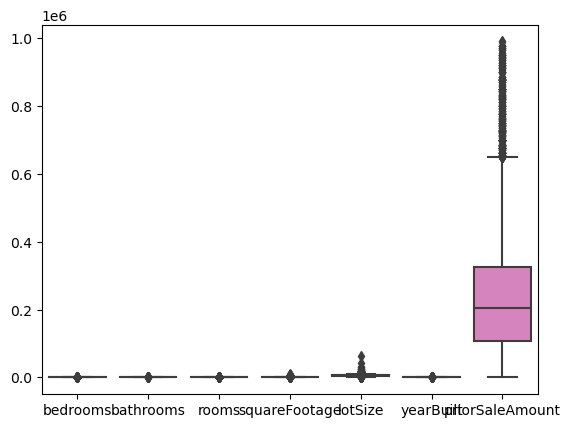

In [64]:
sns.boxplot(data = X5)